<a href="https://colab.research.google.com/github/Vivek199807/Healthcare-AI-ML/blob/main/Sleep_Health_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Sleep Health Analysis and Prediction**

**Project Type** - EDA and predicition

**Contribution** - Individual

###**Problem Statement**

Sleep quality is one of the main products of a healthy lifestyle. We spend about a third of our lives sleeping — or at least we should. All kinds of food that sparkles in food.Unfortunately, many of us fall short of that goal.

###**Solving the problem**

 With the development we are witnessing from artificial intelligence, machine learning models can be used and then trained on a set of training data, then tested on a set of test data, and the classifier predicts whether a person has sleep disorder or not based on the data to be entered.

###**Let's Begin**

**Importing libraries**

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored
import plotly.express as px
import plotly.graph_objects
from sklearn.model_selection import train_test_split

####**Knowing the data**

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
sleep_df=pd.read_csv('/content/drive/MyDrive/alma/Sleep_health_and_lifestyle_dataset.csv')

In [ ]:
sleep_df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
sleep_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


###**Data Features Description**


**Person ID**: An identifier for each individual.

**Gender**: The gender of the person (Male/Female).

**Age**: The age of the person in years.

**Occupation**: The occupation or profession of the person.

**Sleep Duration (hours)**: The number of hours the person sleeps per day.

**Quality of Sleep (scale: 1-10)**: A subjective rating of the quality of sleep, ranging from 1 to 10.

**Physical Activity Level (minutes/day)**: The number of minutes the person engages in physical activity daily.

**Stress Level (scale: 1-10)**: A subjective rating of the stress level experienced by the person, ranging from 1 to 10.

**BMI Category**: The BMI category of the person (e.g., Underweight, Normal, Overweight).

**Blood Pressure (systolic/diastolic)**: The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.

**Heart Rate (bpm)**: The resting heart rate of the person in beats per minute.

**Daily Steps**: The number of steps the person takes per day.

**Sleep Disorder**: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).

In [ ]:
sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [ ]:
sleep_df.columns

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Blood Pressure', 'Heart Rate', 'Daily Steps',
       'Sleep Disorder'],
      dtype='object')

In [ ]:
sleep_df.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


####**Checking and working on duplicates and null values**

In [ ]:
sleep_df.count()

,0
Person ID,374
Gender,374
Age,374
Occupation,374
Sleep Duration,374
Quality of Sleep,374
Physical Activity Level,374
Stress Level,374
BMI Category,374
Blood Pressure,374


In [ ]:
sleep_df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
369,False
370,False
371,False
372,False


So, **sleep disorder** column has some irregularities.

In [ ]:
sleep_df.count()

,0
Person ID,374
Gender,374
Age,374
Occupation,374
Sleep Duration,374
Quality of Sleep,374
Physical Activity Level,374
Stress Level,374
BMI Category,374
Blood Pressure,374


In [ ]:
sleep_df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [ ]:
sleep_df['Sleep Disorder']

,Sleep Disorder
0,NaN
1,NaN
2,NaN
3,Sleep Apnea
4,Sleep Apnea
...,...
369,Sleep Apnea
370,Sleep Apnea
371,Sleep Apnea
372,Sleep Apnea


So, this column's NaN values can't be filled as here "NaN" shows that those pople are not having any 'Sleep Disorder'.

In [ ]:
sleep_df.describe(include='all')

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
count,374.000000,374,374.000000,374,374.000000,374.000000,374.000000,374.000000,374,374,374.000000,374.000000,155
unique,NaN,2,NaN,11,NaN,NaN,NaN,NaN,4,25,NaN,NaN,2
top,NaN,Male,NaN,Nurse,NaN,NaN,NaN,NaN,Normal,130/85,NaN,NaN,Sleep Apnea
freq,NaN,189,NaN,73,NaN,NaN,NaN,NaN,195,99,NaN,NaN,78
mean,187.500000,NaN,42.184492,NaN,7.132086,7.312834,59.171123,5.385027,NaN,NaN,70.165775,6816.844920,NaN
std,108.108742,NaN,8.673133,NaN,0.795657,1.196956,20.830804,1.774526,NaN,NaN,4.135676,1617.915679,NaN
min,1.000000,NaN,27.000000,NaN,5.800000,4.000000,30.000000,3.000000,NaN,NaN,65.000000,3000.000000,NaN
25%,94.250000,NaN,35.250000,NaN,6.400000,6.000000,45.000000,4.000000,NaN,NaN,68.000000,5600.000000,NaN
50%,187.500000,NaN,43.000000,NaN,7.200000,7.000000,60.000000,5.000000,NaN,NaN,70.000000,7000.000000,NaN
75%,280.750000,NaN,50.000000,NaN,7.800000,8.000000,75.000000,7.000000,NaN,NaN,72.000000,8000.000000,NaN


####Data Visualisation

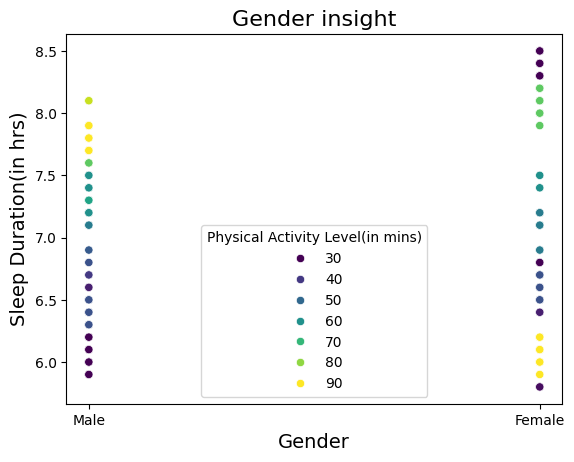

In [ ]:
sns.scatterplot(x='Gender',y='Sleep Duration',data=sleep_df,hue='Physical Activity Level',palette='viridis')
plt.xlabel('Gender',fontsize=14)
plt.ylabel('Sleep Duration(in hrs)',fontsize=14)
plt.title('Gender insight',fontsize=16)
plt.legend(title='Physical Activity Level(in mins)')
plt.show()

In [ ]:
corel=sleep_df[['Age','Sleep Duration','Quality of Sleep','Physical Activity Level','Stress Level','Heart Rate','Daily Steps']].corr()

<Axes: >

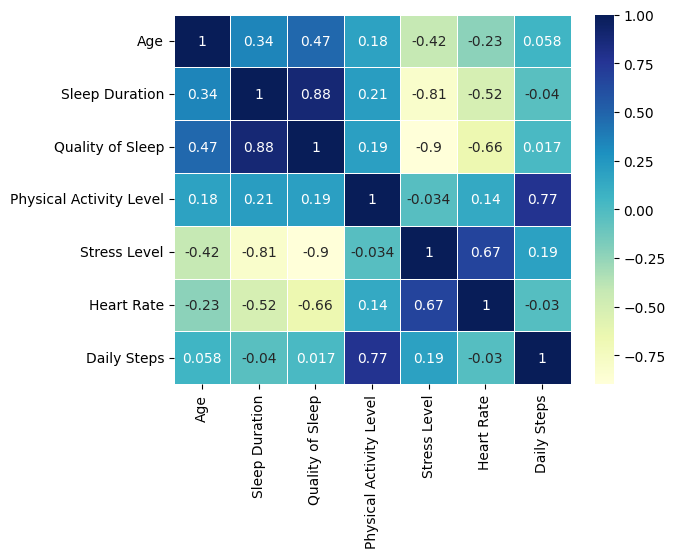

In [ ]:
sns.heatmap(corel, annot=True, cmap="YlGnBu", linewidths=0.5)

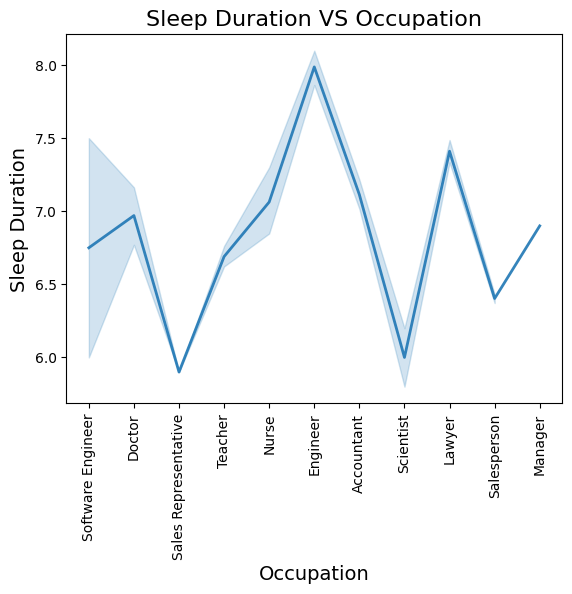

In [ ]:
sns.lineplot(data=sleep_df, x='Occupation', y='Sleep Duration', markers=True, dashes=False, palette='coolwarm', linewidth=2, alpha=0.9)
plt.xticks(rotation=90)
plt.xlabel('Occupation',fontsize=14)
plt.ylabel('Sleep Duration',fontsize=14)
plt.title('Sleep Duration VS Occupation',fontsize=16)
plt.show()

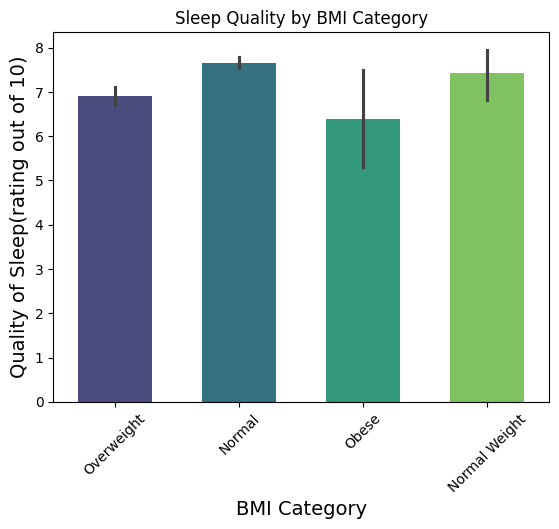

In [ ]:
sns.barplot(x='BMI Category',y='Quality of Sleep',data=sleep_df,palette='viridis',width=0.6)
plt.xticks(rotation=45)
plt.xlabel("BMI Category",fontsize=14)
plt.ylabel("Quality of Sleep(rating out of 10)",fontsize=14)
plt.title('Sleep Quality by BMI Category')
plt.show()

In [ ]:
sleep_df['Sleep Disorder'].fillna('None',inplace=True)

In [ ]:
sleep_df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
sleep_df['Sleep Disorder'].value_counts()

,count
Sleep Disorder,
None,219
Sleep Apnea,78
Insomnia,77


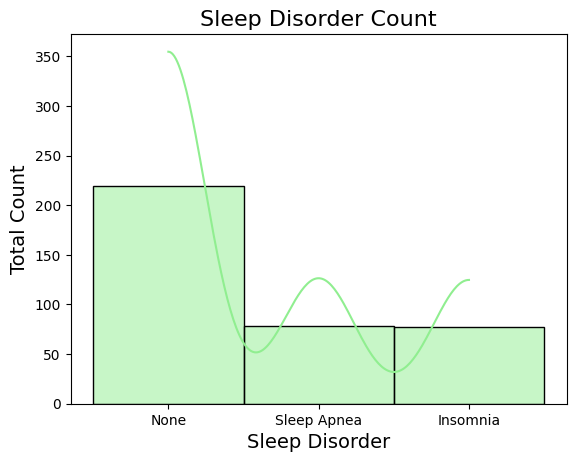

In [ ]:
sns.histplot(sleep_df['Sleep Disorder'],kde=True,color='lightgreen',bins=3)
plt.xlabel('Sleep Disorder',fontsize=14)
plt.ylabel('Total Count',fontsize=14)
plt.title('Sleep Disorder Count',fontsize=16)
plt.show()

In [ ]:
sleep_df.groupby('Sleep Disorder')['Gender'].value_counts()

Sleep Disorder  Gender
Insomnia        Male       41
                Female     36
None            Male      137
                Female     82
Sleep Apnea     Female     67
                Male       11
Name: count, dtype: int64

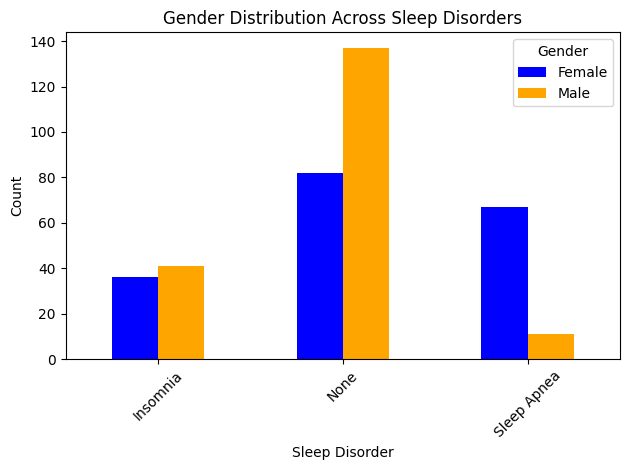

In [ ]:
#Initating the process to convert the output of above code into a DataFrame
data = {'Sleep Disorder': ['Insomnia', 'Insomnia', 'None', 'None', 'Sleep Apnea', 'Sleep Apnea'],
        'Gender': ['Male', 'Female', 'Male', 'Female', 'Female', 'Male'],
        'Count': [41, 36, 137, 82, 67, 11]}

# Create DataFrame
sleep= pd.DataFrame(data)

# Pivot the table to reshape for plotting
pivot_df = sleep.pivot(index='Sleep Disorder', columns='Gender', values='Count')

# Plotting
pivot_df.plot(kind='bar', color=['blue', 'orange'])
plt.title('Gender Distribution Across Sleep Disorders')
plt.xlabel('Sleep Disorder')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

In [ ]:
sleep_df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


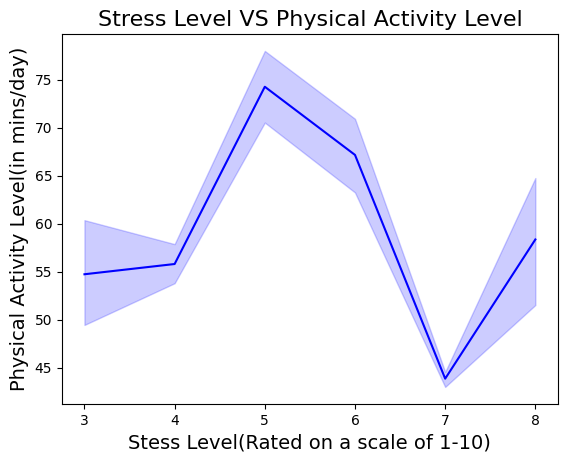

In [ ]:
sns.lineplot(x='Stress Level',y='Physical Activity Level',data=sleep_df,color='b')
plt.title("Stress Level VS Physical Activity Level",fontsize=16)
plt.xlabel("Stess Level(Rated on a scale of 1-10)",fontsize=14)
plt.ylabel("Physical Activity Level(in mins/day)",fontsize=14)
plt.show()

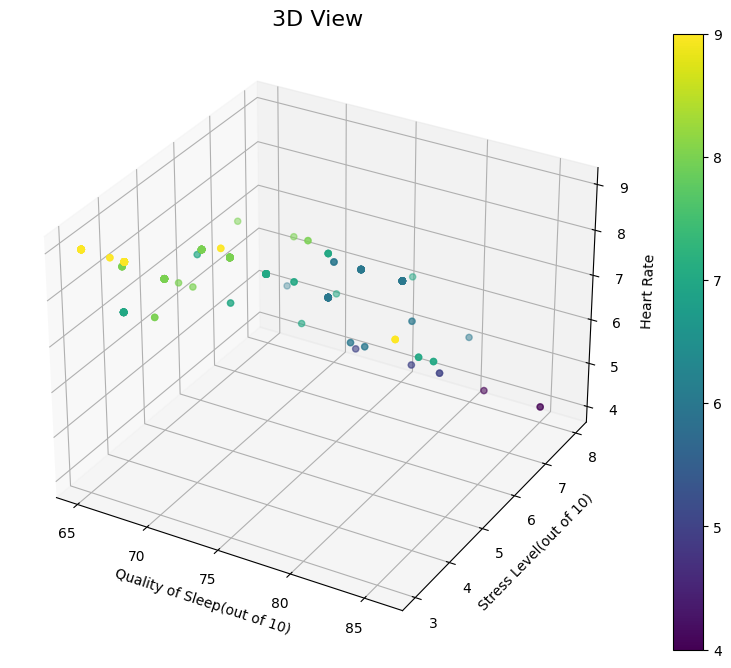

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Create a figure for the plot with a larger size (e.g., 12x8 inches
fig = plt.figure(figsize=(12, 8))
# Add 3D subplot
ax = fig.add_subplot(111, projection='3d')
'''The argument 111 is shorthand for defining the subplot's position in a grid. It’s written as:
First digit (1): The number of rows in the subplot grid (1 row).
Second digit (1): The number of columns in the subplot grid (1 column).
Third digit (1): The index of the subplot in the grid (the 1st subplot in this case).
Since 111 is used, it creates a single subplot that spans the entire figure (1x1 grid)'''
# Create a 3D scatter plot
scatter = ax.scatter3D(sleep_df['Heart Rate'], sleep_df['Stress Level'], sleep_df['Quality of Sleep'], c=sleep_df['Quality of Sleep'], cmap='viridis')

# Adding labels and title
ax.set_title('3D View',fontsize=16)
ax.set_xlabel('Quality of Sleep(out of 10)')
ax.set_ylabel('Stress Level(out of 10)')
ax.set_zlabel('Heart Rate')

# Add color bar
fig.colorbar(scatter)

plt.show()

##**Data Preprocessing/Feature Engineering**

In [ ]:
sleep_df.isna().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [ ]:
sleep_df['Blood Pressure'].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

Ideal BP systolic(upper limit) is 120, diastolic(bottom limit) is 80.
Normal BP systolic(upper limit) is in range(120-129), diastolic(bottom limit) is in range(80-84).
Otherwise, BP is High.

Now, as we are going to implement machine learning model on the data obtained, so we need to provide numerical face to few of the categorical columns.

So, dividing the 'Blood Pressure' column in two different groups:

0 = Normal BP

1 = Abnormal BP

In [ ]:
sleep_df['Blood Pressure']=sleep_df['Blood Pressure'].apply(lambda x:0 if x in ['120/80','126/83','125/80','117/76','118/76','128/85','128/84','115/75','129/84','115/78','119/77','121/79','125/82','122/80','118/75'] else 1)

In [ ]:
!pip install category_encoders

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
encode=OrdinalEncoder()

In [ ]:
columns_to_encode = ['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Physical Activity Level', 'BMI Category', 'Heart Rate', 'Daily Steps', 'Sleep Disorder']
sleep_df[columns_to_encode] = encode.fit_transform(sleep_df[columns_to_encode])

In [ ]:
sleep_df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,1.0,0.0,9.0,3.0,6,4.0,6,3.0,0,10.0,6.0,1.0
1,2,1.0,1.0,1.0,4.0,6,9.0,8,0.0,0,8.0,19.0,1.0
2,3,1.0,1.0,1.0,4.0,6,9.0,8,0.0,0,8.0,19.0,1.0
3,4,1.0,1.0,6.0,1.0,4,0.0,8,2.0,1,17.0,0.0,2.0
4,5,1.0,1.0,6.0,1.0,4,0.0,8,2.0,1,17.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,0.0,30.0,5.0,22.0,9,12.0,3,3.0,1,2.0,15.0,2.0
370,371,0.0,30.0,5.0,21.0,9,12.0,3,3.0,1,2.0,15.0,2.0
371,372,0.0,30.0,5.0,22.0,9,12.0,3,3.0,1,2.0,15.0,2.0
372,373,0.0,30.0,5.0,22.0,9,12.0,3,3.0,1,2.0,15.0,2.0


In [ ]:
sleep_df.drop(['Person ID'],axis=1,inplace=True)

In [ ]:
sleep_df

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1.0,0.0,9.0,3.0,6,4.0,6,3.0,0,10.0,6.0,1.0
1,1.0,1.0,1.0,4.0,6,9.0,8,0.0,0,8.0,19.0,1.0
2,1.0,1.0,1.0,4.0,6,9.0,8,0.0,0,8.0,19.0,1.0
3,1.0,1.0,6.0,1.0,4,0.0,8,2.0,1,17.0,0.0,2.0
4,1.0,1.0,6.0,1.0,4,0.0,8,2.0,1,17.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
369,0.0,30.0,5.0,22.0,9,12.0,3,3.0,1,2.0,15.0,2.0
370,0.0,30.0,5.0,21.0,9,12.0,3,3.0,1,2.0,15.0,2.0
371,0.0,30.0,5.0,22.0,9,12.0,3,3.0,1,2.0,15.0,2.0
372,0.0,30.0,5.0,22.0,9,12.0,3,3.0,1,2.0,15.0,2.0


So, our output is that we wanted to check whether a person has sleeping disorder or not.

###**Data Spliting**###

The last column of "Sleep Disorder" is our output or something that we want to be predicted.

In [ ]:
x=sleep_df.iloc[:,:-1]
y=sleep_df.iloc[:,-1]

In [ ]:
x.shape

(374, 11)

In [ ]:
y.shape

(374,)

###Training and Testing of the **Data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
x_train.shape

(261, 11)

In [ ]:
x_test.shape

(113, 11)

In [ ]:
y_train.shape

(261,)

In [ ]:
y_test.shape

(113,)

###**Data** **Modelling**

####MODEL-1: Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model1=LogisticRegression()
model1.fit(x_train,y_train)

LogisticRegression()

In [ ]:
train_class_preds_model1=model1.predict(x_train)

In [ ]:
test_class_preds_model1=model1.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy1=accuracy_score(y_test,test_class_preds_model1)
print(accuracy1)

0.911504424778761


In [ ]:
from sklearn.metrics import precision_score
precision1_wg=precision_score(y_test,test_class_preds_model1,average='weighted')
print(precision1_wg)

0.9145306021412216


In [ ]:
from sklearn.metrics import precision_score
precision1_ma=precision_score(y_test,test_class_preds_model1,average='macro')
print(precision1_ma)

0.9002331002331002


In [ ]:
from sklearn.metrics import recall_score
recall1_wg=recall_score(y_test,test_class_preds_model1,average='weighted')
print(recall1_wg)

0.911504424778761


In [ ]:
from sklearn.metrics import recall_score
recall1_ma=recall_score(y_test,test_class_preds_model1,average='macro')
print(recall1_ma)

0.8788829151732377


In [ ]:
from sklearn.metrics import f1_score
f1_1_wg=f1_score(y_test,test_class_preds_model1,average='weighted')
print(f1_1_wg)

0.9102824093890919


In [ ]:
from sklearn.metrics import f1_score
f1_1_ma=f1_score(y_test,test_class_preds_model1,average='macro')
print(f1_1_ma)

0.8859242594675667


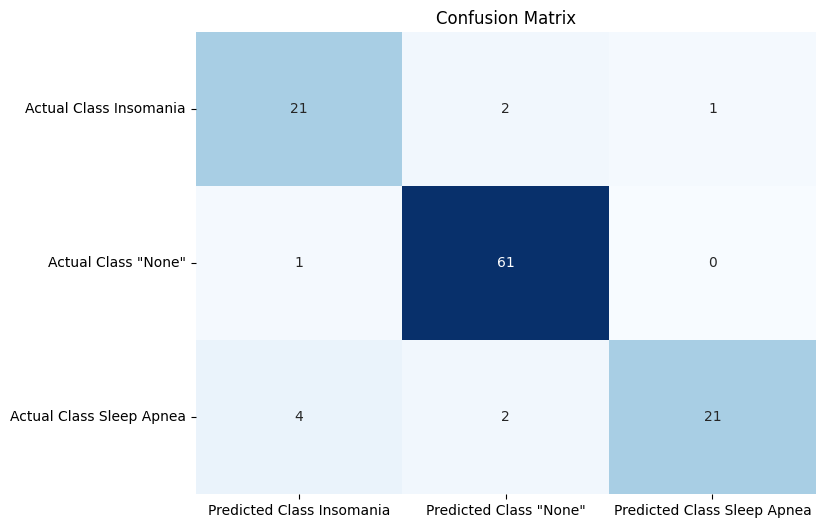

In [ ]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test,test_class_preds_model1)
plt.figure(figsize=(8, 6))
sns.heatmap(con_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Class Insomania', 'Predicted Class "None"', 'Predicted Class Sleep Apnea'],
            yticklabels=['Actual Class Insomania', 'Actual Class "None"', 'Actual Class Sleep Apnea'])
plt.title('Confusion Matrix')
plt.show()

####Model-2:- XGBoost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model2=XGBClassifier()
model2.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
train_class_preds_model2=model2.predict(x_train)

In [ ]:
test_class_preds_model2=model2.predict(x_test)

As here the dataset in not that imbalanced so, we can use accuracy, recall, f1_score, precision as metrics to audit the model.

In [ ]:
from sklearn.metrics import accuracy_score
accuracy2=accuracy_score(y_test,test_class_preds_model2)
print(accuracy2)

0.911504424778761


In [ ]:
from sklearn.metrics import precision_score
precision2_wg=precision_score(y_test,test_class_preds_model2,average='weighted')
print(precision2_wg)

0.9109257998638529


In [ ]:
from sklearn.metrics import precision_score
precision2_ma=precision_score(y_test,test_class_preds_model2,average='macro')
print(precision2_ma)

0.8961538461538461


In [ ]:
from sklearn.metrics import recall_score
recall2_wg=recall_score(y_test,test_class_preds_model2,average='weighted')
print(recall2_wg)

0.911504424778761


In [ ]:
from sklearn.metrics import recall_score
recall2_ma=recall_score(y_test,test_class_preds_model2,average='macro')
print(recall2_ma)

0.8773397052966946


In [ ]:
from sklearn.metrics import f1_score
f1_2_wg=f1_score(y_test,test_class_preds_model2,average='weighted')
print(f1_2_wg)

0.9102050687183103


In [ ]:
from sklearn.metrics import f1_score
f1_2_ma=f1_score(y_test,test_class_preds_model2,average='macro')
print(f1_2_ma)

0.885569450877464


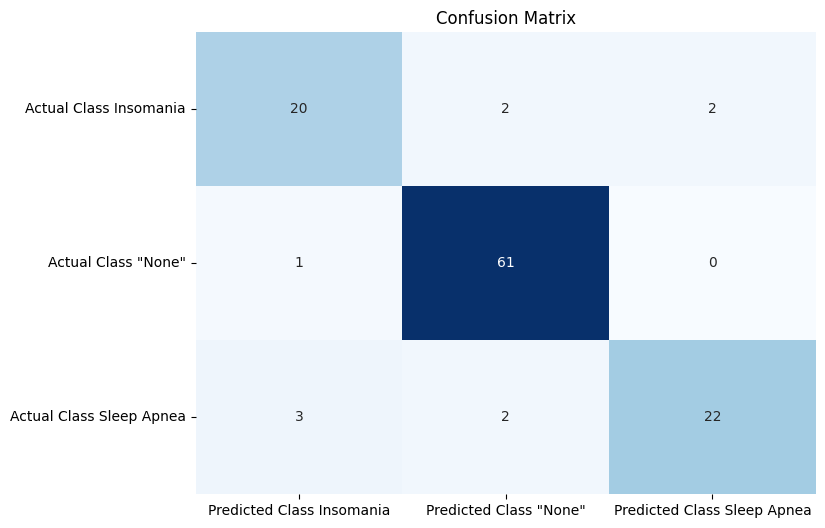

In [ ]:
from sklearn.metrics import confusion_matrix
con_mat_2 = confusion_matrix(y_test,test_class_preds_model2)
plt.figure(figsize=(8, 6))
sns.heatmap(con_mat_2, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Class Insomania', 'Predicted Class "None"', 'Predicted Class Sleep Apnea'],
            yticklabels=['Actual Class Insomania', 'Actual Class "None"', 'Actual Class Sleep Apnea'])
plt.title('Confusion Matrix')
plt.show()

####Model:-3 **CatBoostClassifier**

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
model3=CatBoostClassifier()
model3.fit(x_train,y_train)

Learning rate set to 0.073888
0:	learn: 1.0230829	total: 2.48ms	remaining: 2.48s
1:	learn: 0.9515424	total: 3.45ms	remaining: 1.72s
2:	learn: 0.8952797	total: 4.24ms	remaining: 1.41s
3:	learn: 0.8405841	total: 4.9ms	remaining: 1.22s
4:	learn: 0.7927858	total: 5.56ms	remaining: 1.11s
5:	learn: 0.7528952	total: 6.5ms	remaining: 1.08s
6:	learn: 0.7139319	total: 7.62ms	remaining: 1.08s
7:	learn: 0.6819185	total: 8.76ms	remaining: 1.08s
8:	learn: 0.6523433	total: 9.67ms	remaining: 1.06s
9:	learn: 0.6228990	total: 10.4ms	remaining: 1.03s
10:	learn: 0.5977194	total: 11ms	remaining: 992ms
11:	learn: 0.5740717	total: 11.7ms	remaining: 966ms
12:	learn: 0.5533608	total: 12.4ms	remaining: 941ms
13:	learn: 0.5356847	total: 13.1ms	remaining: 924ms
14:	learn: 0.5187425	total: 13.8ms	remaining: 908ms
15:	learn: 0.5029872	total: 14.5ms	remaining: 892ms
16:	learn: 0.4874138	total: 15.3ms	remaining: 887ms
17:	learn: 0.4742704	total: 15.9ms	remaining: 869ms
18:	learn: 0.4629020	total: 16.7ms	remaining: 86

In [ ]:
train_class_preds_model3=model3.predict(x_train)
test_class_preds_model3=model3.predict(x_test)

Checking the metrics

In [ ]:
from sklearn.metrics import accuracy_score
accuracy3=accuracy_score(y_test,test_class_preds_model3)
print(accuracy3)

0.8938053097345132


In [ ]:
from sklearn.metrics import precision_score
precision3_wg=precision_score(y_test,test_class_preds_model3,average='weighted')
print(precision3_wg)

0.8955009592177734


In [ ]:
from sklearn.metrics import precision_score
precision3_ma=precision_score(y_test,test_class_preds_model3,average='macro')
print(precision3_ma)

0.8722610722610723


In [ ]:
from sklearn.metrics import recall_score
recall3_wg=recall_score(y_test,test_class_preds_model3,average='weighted')
print(recall3_wg)

0.8938053097345132


In [ ]:
from sklearn.metrics import recall_score
recall3_ma=recall_score(y_test,test_class_preds_model3,average='macro')
print(recall3_ma)

0.8526483472720031


In [ ]:
from sklearn.metrics import f1_score
f1_3_wg=f1_score(y_test,test_class_preds_model3,average='weighted')
print(f1_3_wg)

0.8920342605720429


In [ ]:
from sklearn.metrics import f1_score
f1_3_ma=f1_score(y_test,test_class_preds_model3,average='macro')
print(f1_3_ma)

0.8589854839573624


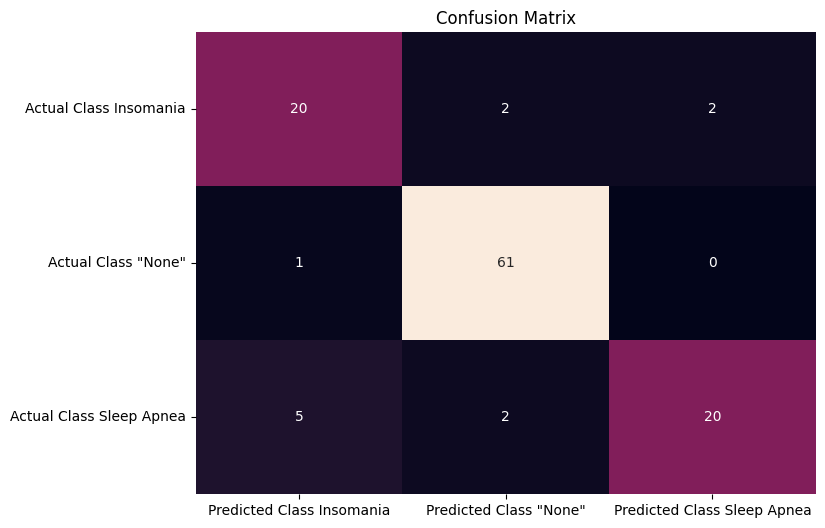

In [ ]:
from sklearn.metrics import confusion_matrix
con_mat_3 = confusion_matrix(y_test,test_class_preds_model3)
plt.figure(figsize=(8,6))
sns.heatmap(con_mat_3,annot=True,fmt='d',cbar=False,
            xticklabels=['Predicted Class Insomania','Predicted Class "None"','Predicted Class Sleep Apnea'],
            yticklabels=['Actual Class Insomania','Actual Class "None"','Actual Class Sleep Apnea'])
plt.title("Confusion Matrix")
plt.show()

####Model-4:- **GradientBoostingClassifier Model**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model4=GradientBoostingClassifier()
model4.fit(x_train,y_train)

GradientBoostingClassifier()

In [ ]:
train_class_preds_model4=model4.predict(x_train)
test_class_preds_model4=model4.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy4=accuracy_score(y_test,test_class_preds_model4)
print(accuracy4)

0.8938053097345132


In [ ]:
from sklearn.metrics import precision_score
precision4_wg=precision_score(y_test,test_class_preds_model4,average='weighted')
print(precision4_wg)

0.8955009592177734


In [ ]:
from sklearn.metrics import precision_score
precision4_ma=precision_score(y_test,test_class_preds_model4,average='macro')
print(precision4_ma)

0.8722610722610723


In [ ]:
from sklearn.metrics import recall_score
recall4_wg=recall_score(y_test,test_class_preds_model4,average='weighted')
print(recall4_wg)

0.8938053097345132


In [ ]:
from sklearn.metrics import recall_score
recall4_ma=recall_score(y_test,test_class_preds_model4,average='macro')
print(recall4_ma)

0.8526483472720031


In [ ]:
from sklearn.metrics import f1_score
f1_4_wg=f1_score(y_test,test_class_preds_model4,average='weighted')
print(f1_4_wg)

0.8920342605720429


In [ ]:
from sklearn.metrics import f1_score
f1_4_ma=f1_score(y_test,test_class_preds_model4,average='macro')
print(f1_4_ma)

0.8589854839573624


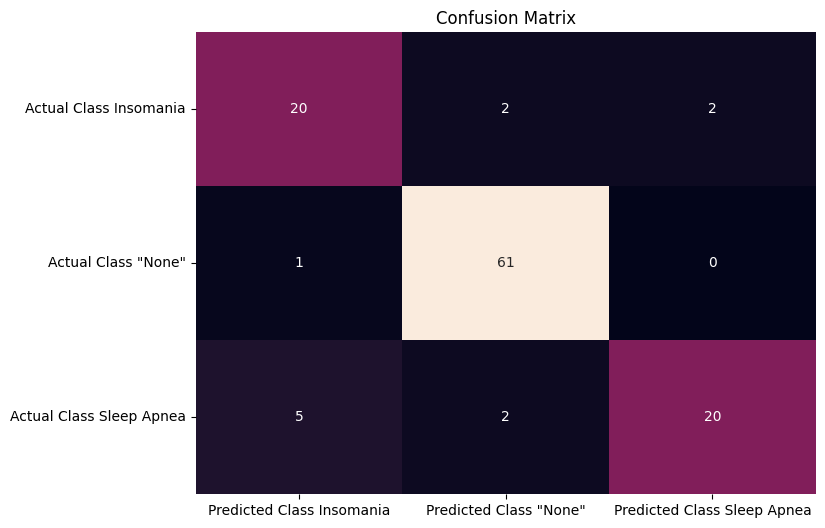

In [ ]:
from sklearn.metrics import confusion_matrix
con_mat_4 = confusion_matrix(y_test,test_class_preds_model4)
plt.figure(figsize=(8,6))
sns.heatmap(con_mat_4,annot=True,fmt='d',cbar=False,
            xticklabels=['Predicted Class Insomania','Predicted Class "None"','Predicted Class Sleep Apnea'],
            yticklabels=['Actual Class Insomania','Actual Class "None"','Actual Class Sleep Apnea'])
plt.title("Confusion Matrix")
plt.show()

####Model-5:- **Support Vector Classifier Model**

In [ ]:
from sklearn.svm import SVC
model5=SVC()
model5.fit(x_train,y_train)

SVC()

In [ ]:
test_class_preds_model5=model5.predict(x_test)
train_class_preds_model5=model5.predict(x_train)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy5=accuracy_score(y_test,test_class_preds_model5)
print(round((accuracy5*100),2),'%')

89.38 %


In [ ]:
from sklearn.metrics import precision_score
precision5_wg=precision_score(y_test,test_class_preds_model5,average='weighted')
print(round((precision5_wg*100),2),'%')

89.42 %


In [ ]:
from sklearn.metrics import precision_score
precision5_ma=precision_score(y_test,test_class_preds_model5,average='macro')
print(round((precision5_ma*100),2),'%')

87.78 %


In [ ]:
from sklearn.metrics import recall_score
recall5_wg=recall_score(y_test,test_class_preds_model5,average='weighted')
print(round((recall5_wg*100),2),'%')

89.38 %


In [ ]:
from sklearn.metrics import recall_score
recall5_ma=recall_score(y_test,test_class_preds_model5,average='macro')
print(round((recall5_ma*100),2),'%')

85.26 %


In [ ]:
from sklearn.metrics import f1_score
f1_5_wg=f1_score(y_test,test_class_preds_model5,average='weighted')
print(round((f1_5_wg*100),2),'%')

89.14 %


In [ ]:
from sklearn.metrics import f1_score
f1_5_ma=f1_score(y_test,test_class_preds_model5,average='macro')
print(round((f1_5_ma*100),2),'%')

86.19 %


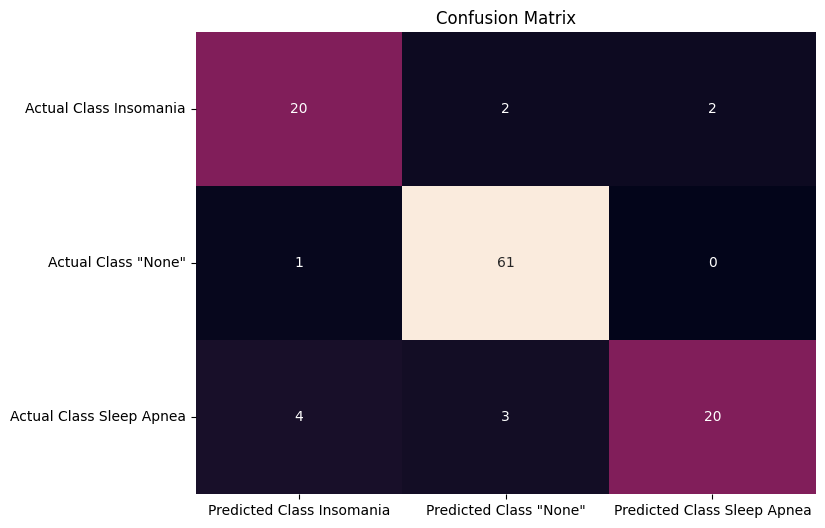

In [ ]:
from sklearn.metrics import confusion_matrix
con_mat_5=confusion_matrix(y_test,test_class_preds_model5)
plt.figure(figsize=(8,6))
sns.heatmap(con_mat_5,fmt='d',cbar=False,annot=True,
            xticklabels=['Predicted Class Insomania','Predicted Class "None"','Predicted Class Sleep Apnea'],
            yticklabels=['Actual Class Insomania','Actual Class "None"','Actual Class Sleep Apnea'])
plt.title('Confusion Matrix')
plt.show()

###**Conclusion**

So, all the above results of different ML Models suggest that the Gradient Boosting Classifier is the most reliable model for this sleep health prediction task, offering a balanced trade-off between precision and recall while achieving the highest overall performance.